# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

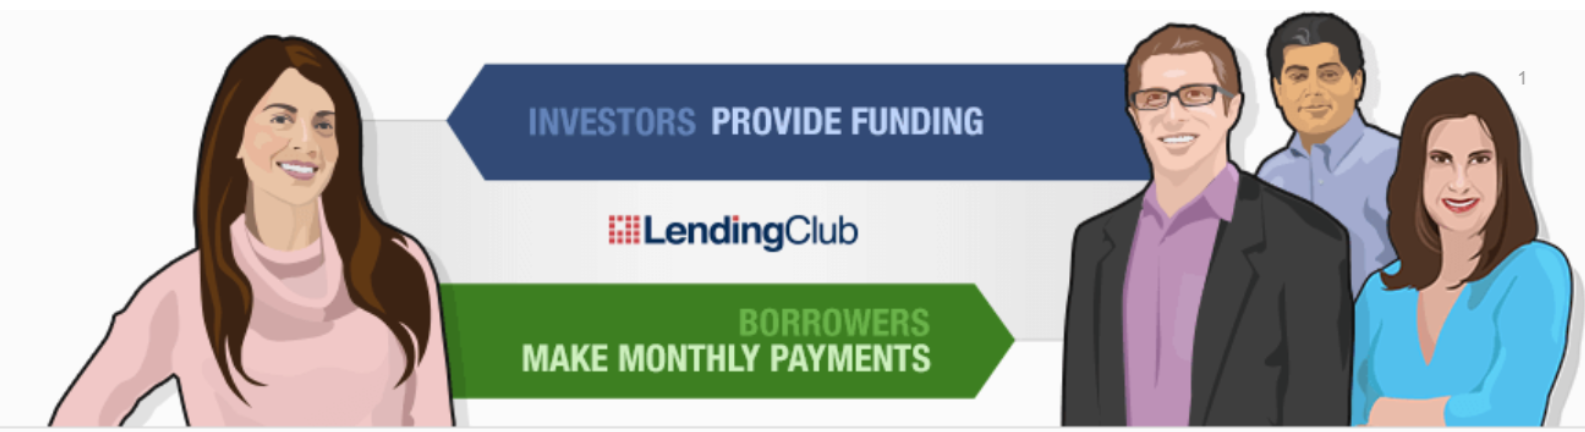

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This notebook outlines the development of a binary classification model using historical Lending Club loan data. The objective is to create a system that supports faster, more consistent loan decision-making based on applicant features.

## Data Understanding

This project uses approximately 38,000 loan application records from Lending Club. The dataset includes various applicant and loan-related features, which are described in the table below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

### Necessary Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
## Load the dataset
loansdf = pd.read_csv('/content/drive/MyDrive/IK notes/7.Mini_projects/ML Mini project - Lending/loans.csv')
loansdf.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [8]:
## Observe the first few rows
## Do you observe any issues?
# Columns like int_rate , emp_length , revol_util need to be cleaned up.

In [9]:
## Check the dataframe structure - datatypes and number of non-null rows
loansdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [10]:
## Check the shape
loansdf.shape

(38770, 23)

In [11]:
## Check the missing values across the columns
loansdf.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


#### Observations

In [12]:
# - The dataset contains 39,717 rows and 22 columns.
# - The columns `emp_length`, `revol_util` have missing values.  This needs to be addressed.
# - The data types of some columns appear incorrect or need further investigation (e.g., `int_rate`, `revol_util` are likely numerical but might be stored as strings due to the '%' symbol or other characters).
# - The `loan_status` column is the target variable, and its distribution needs to be analyzed to understand class imbalance.
# - Some columns, like `id` and `member_id` might not be relevant for the prediction task and could potentially be dropped.
# - Columns like `emp_length` might need careful handling, since values are represented as strings (e.g., "< 1 year").
# - It's important to understand the meaning and potential relevance of each column to the loan default prediction.
# - Explore the distribution of numerical and categorical features to understand potential outliers or unusual patterns.
# - The presence of special characters (e.g. %, $) within numerical columns will need to be removed before analysis or modeling.

### Data Cleaning

- Missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [13]:
# looking at emp_length
loansdf['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [14]:
# Encoding emp_length and imputing missing values with median

# Convert 'term' into numeric (36 months -> 36, 60 months -> 60)
loansdf['term'] = loansdf['term'].str.extract('(\d+)').astype(int)

# Convert 'emp_length' into numeric (handling '< 1 year' and '10+ years' cases)
loansdf['emp_length'] = loansdf['emp_length'].str.extract('(\d+)').astype(float)

# Fill missing values in 'emp_length' with median
loansdf['emp_length'].fillna(loansdf['emp_length'].median(), inplace=True)

In [15]:
# Remove special characters from 'int_rate' and 'revol_util'
loansdf['int_rate'] = loansdf['int_rate'].str[:-1].astype(float)
loansdf['revol_util'] = loansdf['revol_util'].str[:-1].astype(float)

# Drop rows with missing values in revol_util because it has only 50 missing values which is very small compared to total number of rows in our dataset
loansdf = loansdf.dropna(subset=['revol_util'])


In [16]:
loansdf.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60,15.27,59.83,C,C4,1.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,Fully Paid


##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [17]:
## Drop the above columns
loansdf.drop(['id', 'member_id', 'installment', 'last_pymnt_amnt'], axis=1, inplace=True)

In [18]:
## Check the dataframe again
loansdf.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36,10.65,B,B2,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid
1,2500.0,60,15.27,C,C4,1.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off
2,2400.0,36,15.96,C,C5,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid
3,10000.0,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,Fully Paid
4,5000.0,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,Fully Paid


In [19]:
loansdf.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,38720.000000,38720.000000,38720.000000,38720.000000,3.872000e+04,38720.000000,38720.000000,38720.000000,38720.000000,38720.000000,38720.000000,38720.000000,38720.00000
mean,11077.349561,41.994421,11.942918,5.037991,6.883138e+04,13.280317,0.146643,0.871488,9.284814,0.055424,13313.162035,48.709217,22.07469
std,7362.277806,10.389216,3.696741,3.361641,6.415749e+04,6.674714,0.491971,1.071654,4.400444,0.237775,15863.703384,28.362749,11.41722
min,500.000000,36.000000,5.420000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.00000
25%,5393.750000,36.000000,8.940000,2.000000,4.000000e+04,8.140000,0.000000,0.000000,6.000000,0.000000,3667.750000,25.200000,13.00000
50%,9800.000000,36.000000,11.720000,4.000000,5.900000e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8792.000000,49.100000,20.00000
75%,15000.000000,36.000000,14.420000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16948.250000,72.300000,29.00000
max,35000.000000,60.000000,24.590000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.00000


### Exploratory Data Analysis

Let's begin with exploratory data analysis (EDA) to identify key factors associated with loan default. This preliminary analysis helps us understand variable distributions, detect patterns, and explore relationships between features and the target variable before building our machine learning model.

#### Univariate Analysis

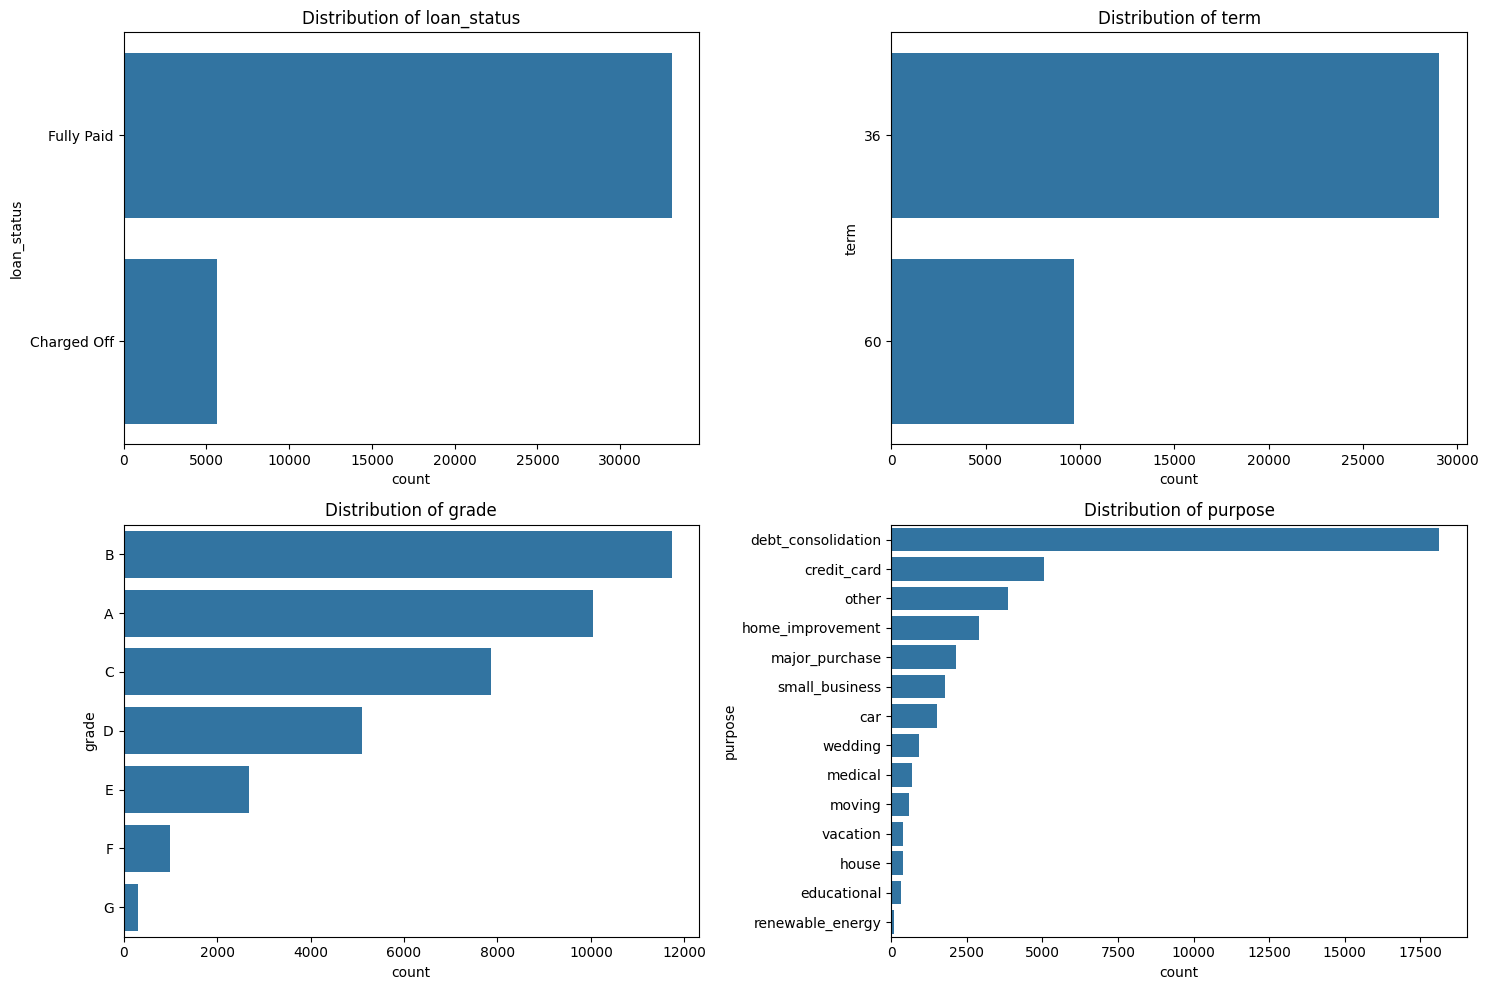

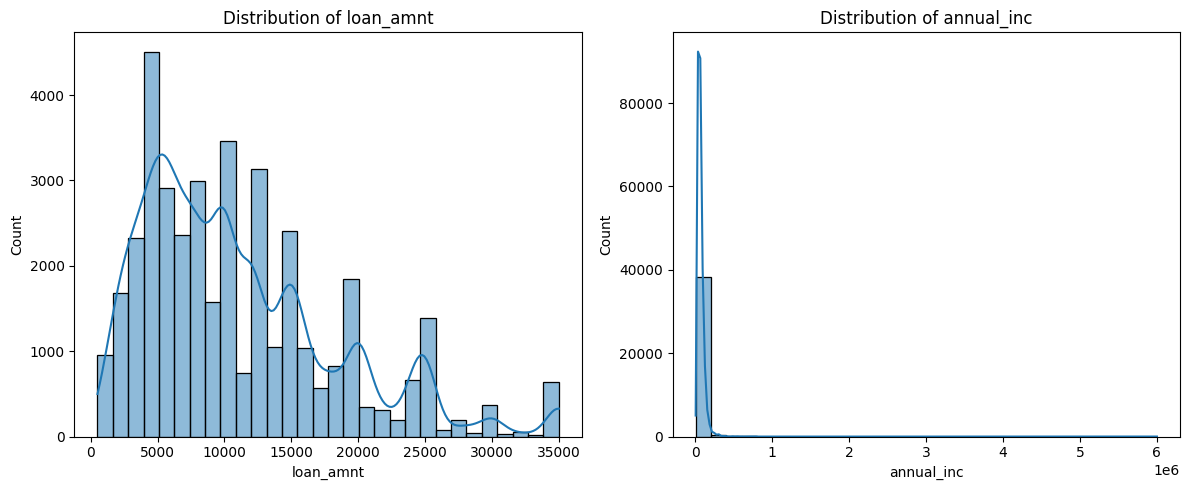

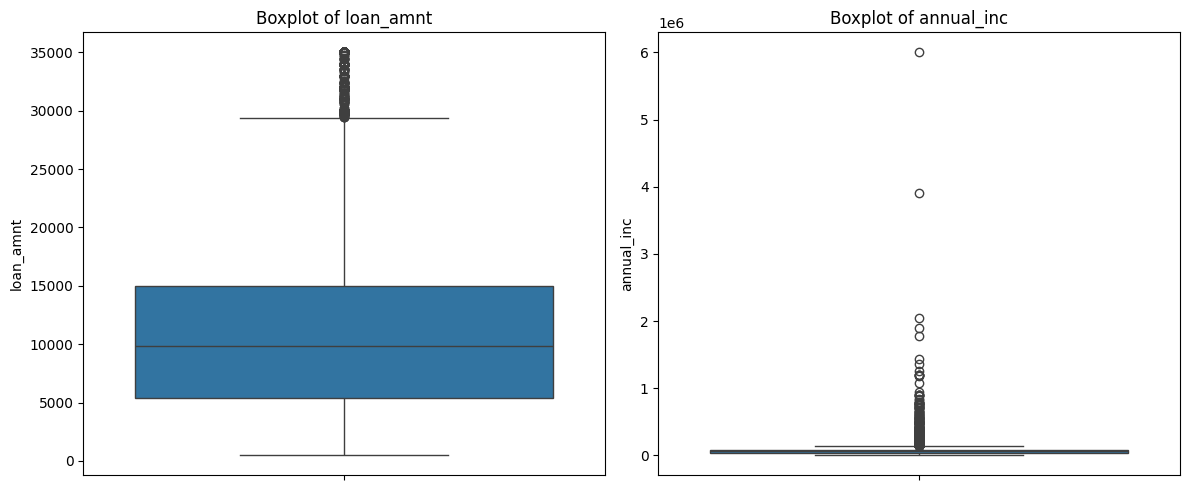

In [20]:
# Count plots for categorical variables
categorical_vars = ['loan_status', 'term', 'grade', 'purpose']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(y=loansdf[var], order=loansdf[var].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")

plt.tight_layout()
plt.show()

# Histograms for numerical variables
numerical_vars = ['loan_amnt', 'annual_inc']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, var in enumerate(numerical_vars):
    sns.histplot(loansdf[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")

plt.tight_layout()
plt.show()

# Boxplots to identify outliers in numerical variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, var in enumerate(numerical_vars):
    sns.boxplot(y=loansdf[var], ax=axes[i])
    axes[i].set_title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()

In [21]:
loansdf[['loan_amnt', 'annual_inc']].describe()

,loan_amnt,annual_inc
count,38720.000000,3.872000e+04
mean,11077.349561,6.883138e+04
std,7362.277806,6.415749e+04
min,500.000000,4.000000e+03
25%,5393.750000,4.000000e+04
50%,9800.000000,5.900000e+04
75%,15000.000000,8.200000e+04
max,35000.000000,6.000000e+06


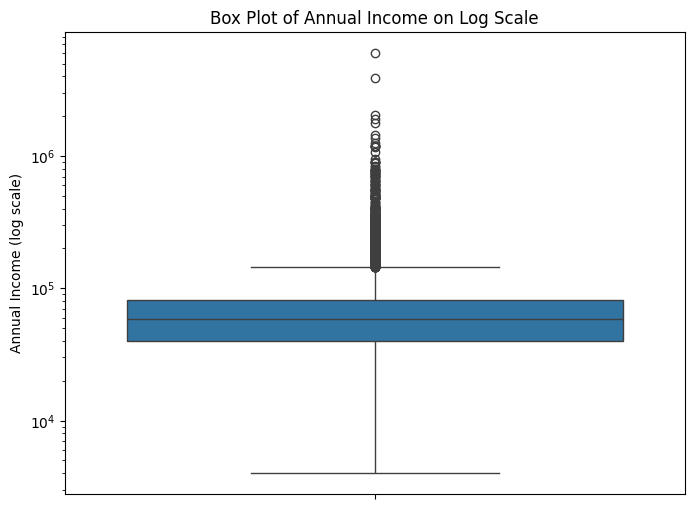

In [22]:
# Another look at box plot for annual income on log scale
plt.figure(figsize=(8, 6))
sns.boxplot(y=loansdf['annual_inc'])
plt.yscale('log')
plt.ylabel('Annual Income (log scale)')
plt.title('Box Plot of Annual Income on Log Scale')
plt.show()

**Observations**

1. Categorical Variables
* Loan Status:
    * The dataset contains only "Fully Paid" and "Charged Off" loans.
    * Majority of loans are Fully Paid, while a smaller proportion are Charged Off.
    * This makes loan_status a binary classification target variable (successful vs. defaulted loans).
* Term:
    * The dataset contains two loan terms: 36 months and 60 months.
    * Loans with a 36-month term are more frequent than 60-month loans.
* Grade:
    * Loans are assigned grades from A to G, with more loans concentrated in grades B and C.
    * Higher grades (A, B) indicate lower risk, while lower grades (F, G) are riskier.
* Purpose:
    * The most frequent purpose for loans includes Debt Consolidation, Credit Card, and Home Improvement.
    * Debt Consolidation loans dominate, indicating that borrowers primarily use Lending Club loans for managing multiple debts.
2. Numerical Variables
* Loan Amount (loan_amnt)
    * Mean Loan Amount: $11,077
    * Median Loan Amount: Around $9,800
    * Range: $500 - $35,000
    * Most loans are between $5,000 and $15,000, with some outliers at higher amounts.
    * Boxplot observations:
        * Some loans reach the maximum of $35,000, which might be outliers.
* Annual Income (annual_inc)
    * Mean Annual Income: $68,831
    * Median Annual Income: $59,000
    * Wide variation: Some borrowers have very high incomes, skewing the distribution.
    * Annual incomes range from $4,000 to very high values, but the majority of borrowers have incomes between $40,000 and $82,000.
    * Boxplot observations:
        * There are outliers in annual income, with some borrowers reporting very high incomes compared to the majority.




#### Bivariate Analysis

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

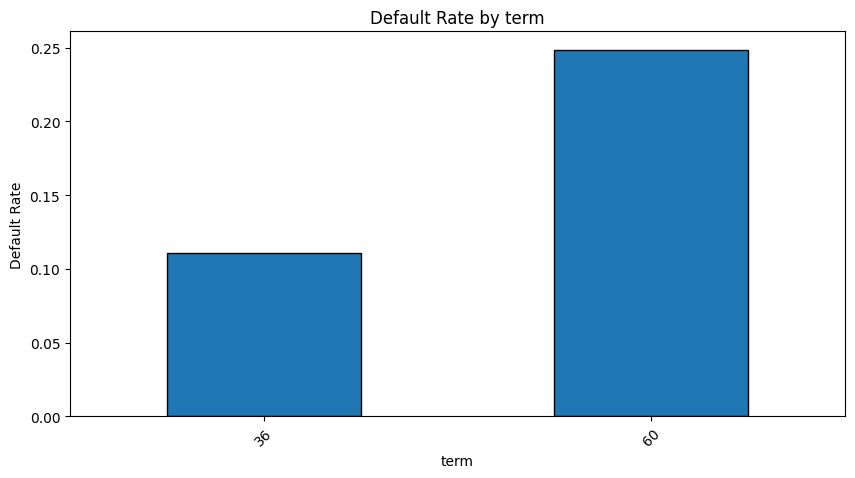

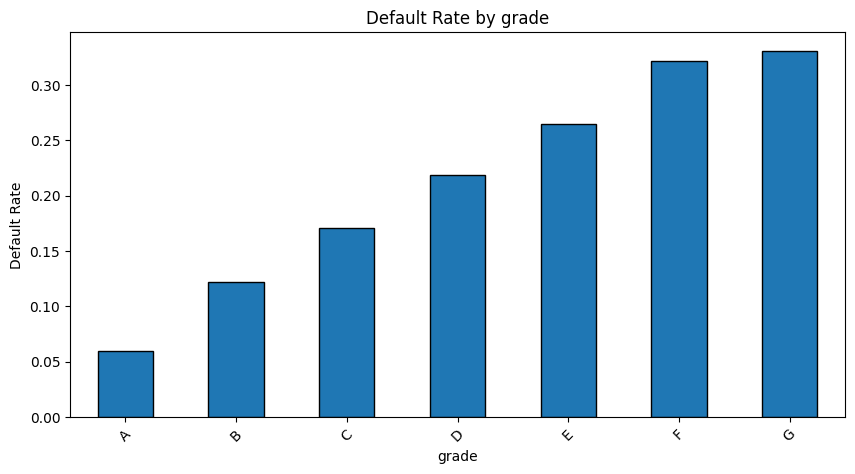

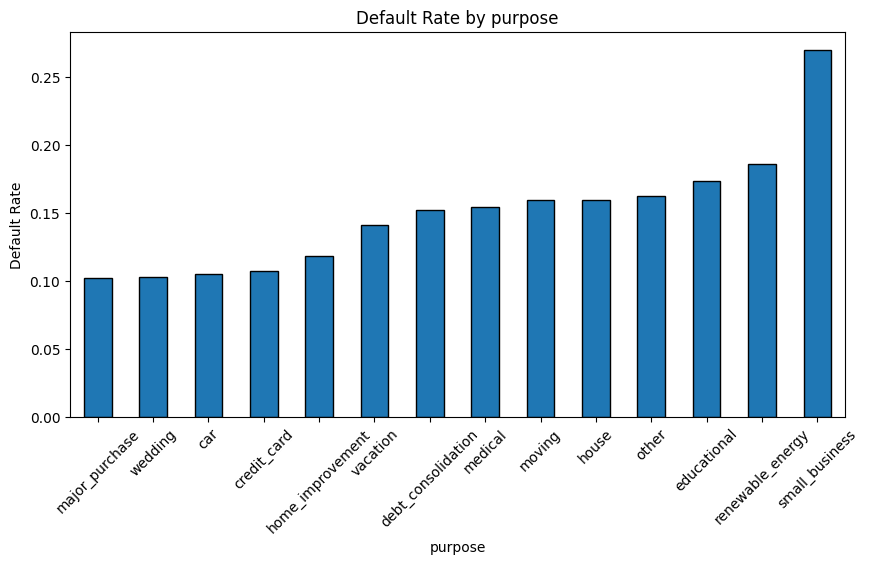

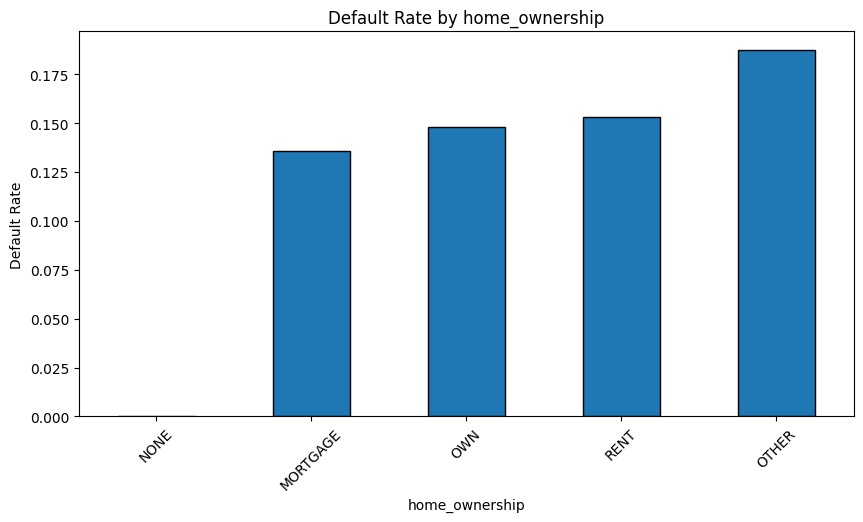

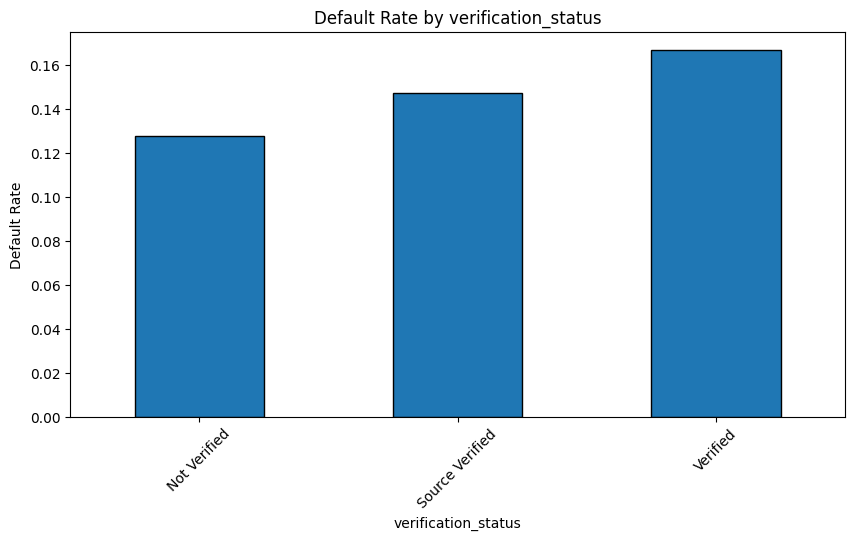

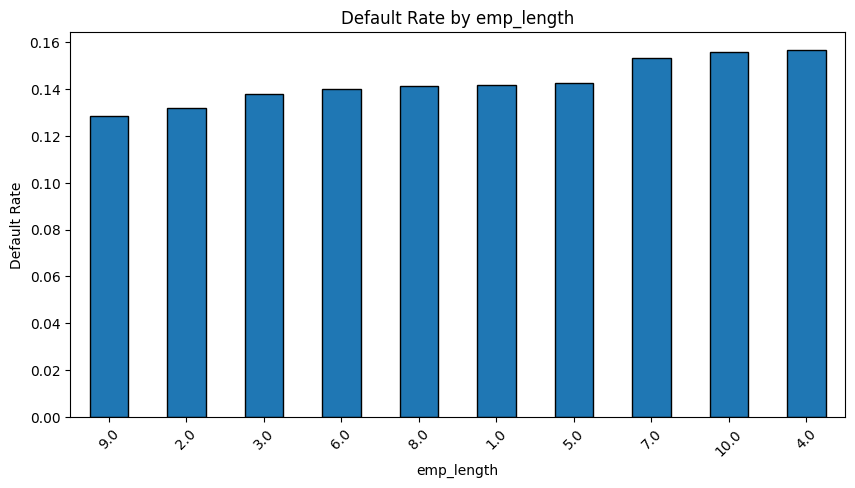

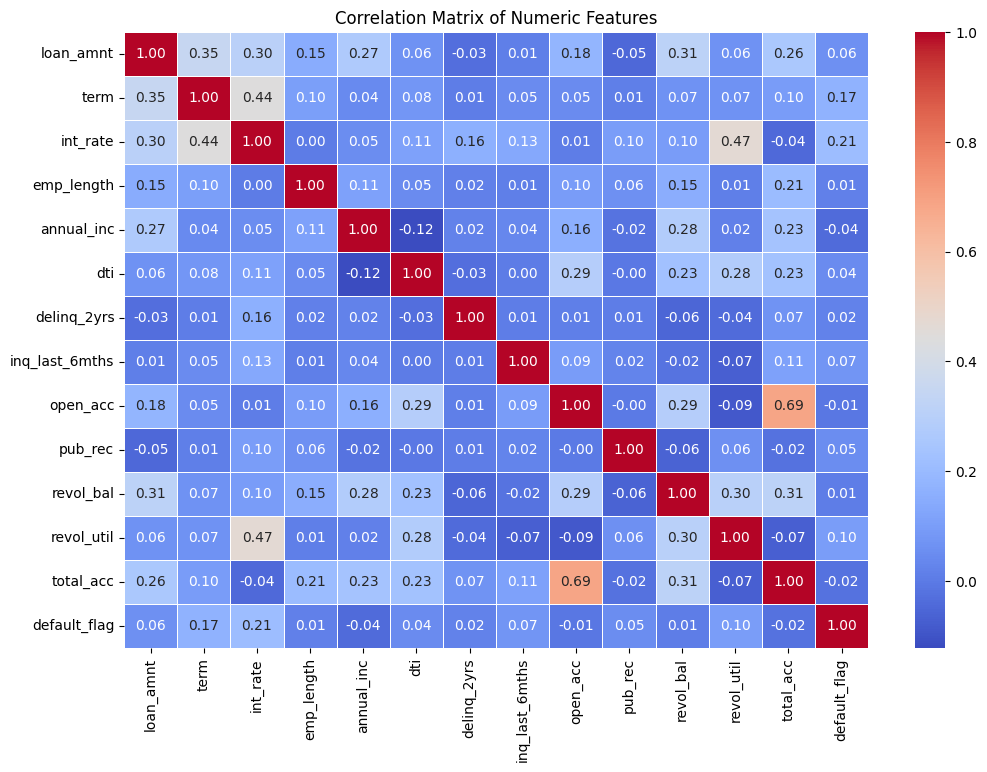

In [23]:
# Creating a new column for defaulted loans (1 if Charged Off, 0 otherwise)
loansdf['default_flag'] = loansdf['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)
loansdf.drop(columns='loan_status', inplace=True)

# Default rate across different categorical variables
categorical_columns = ['term', 'grade', 'purpose', 'home_ownership', 'verification_status', 'emp_length']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    default_rates = loansdf.groupby(col)['default_flag'].mean()
    default_rates.sort_values().plot(kind='bar', edgecolor='black')
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Default Rate")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = loansdf.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

**Bivariate Analysis Summary:**

***Default Rate Across Different Variables:***
1. Term:
  * Loans with a 60-month term have a significantly higher default rate compared to 36-month loans suggesting that longer-term loans carry a higher risk of non-repayment.
2. Grade:
  * Lower-grade loans (D, E, F, G) have higher default rates.
  * Higher-grade loans (A, B) have lower default rates, confirming that loan grading is a strong predictor of risk.
3. Purpose:
  * Loans taken for small business purposes have the highest default rate.
  * Debt consolidation and credit card refinancing have moderate default rates.
  * Loans for weddings and home improvements have relatively low default rates.
4. Home Ownership:
  * Borrowers who rent have a higher default rate compared to those who own or have a mortgage.
  * This suggests that homeownership might be a sign of financial stability.
5. Verification Status:
  * Not Verified loans have a higher default rate than Source Verified and Verified loans.
  * This indicates that verified income might reduce the risk of default.
6. Employment Length:
  * Borrowers with shorter employment history (0-1 years) have higher default rates.
  * More stable employment (10+ years) shows lower risk.


***Correlation Matrix Observations:***
  * Loan amount is slightly positively correlated with default rate, suggesting that higher loan amounts may have a higher risk of non-repayment.
  * Revolving utilization and debt-to-income (DTI) ratio show a mild positive correlation with default risk, indicating that higher credit utilization and debt burden contribute to higher default probability.
  * Annual income shows almost no correlation with default, indicating that high income alone does not guarantee repayment

#### Pre-ML Data Pre-Processing:
- encoding all the categorical variables
- handle class imbalance
- train-test split
- scaling

**Encoding Categorical Variables**

In [24]:
# Add this import statement at the top of your code
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for ordinal categorical variables
label_encoders = {}
ordinal_columns = ['grade', 'sub_grade', 'term', 'emp_length']
for col in ordinal_columns:
    le = LabelEncoder()
    loansdf[col] = le.fit_transform(loansdf[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# Apply One-Hot Encoding for nominal categorical variables
nominal_columns = ['home_ownership', 'verification_status', 'purpose']
loansdf = pd.get_dummies(loansdf, columns=nominal_columns, drop_first=True)  # Drop first category to avoid multicollinearity
# Summary of encoding applied
encoding_summary = {
    "Label Encoding": ["grade", "sub_grade", "term", "emp_length"],
    "One-Hot Encoding": ["home_ownership", "verification_status", "purpose"],
    "Target Variable": "Converted loan_status to default_flag (0/1)"
    }

encoding_summary

{'Label Encoding': ['grade', 'sub_grade', 'term', 'emp_length'],
 'One-Hot Encoding': ['home_ownership', 'verification_status', 'purpose'],
 'Target Variable': 'Converted loan_status to default_flag (0/1)'}

**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split.

In [25]:
from sklearn.model_selection import train_test_split

# Train-Test Split (Before Handling Class Imbalance)
X = loansdf.drop(columns=['default_flag'])  # Features
y = loansdf['default_flag']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Scaling**

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Log transform annual_inc to reduce outliers' impact
loansdf['annual_inc'] = np.log1p(loansdf['annual_inc'])  # log1p handles zero values

# Apply StandardScaler to all numerical columns (after log transformation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Handling Class Imbalance**

using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [28]:
## Check the distribution of class in the newly resampled data
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: default_flag
0    26482
1     4494
Name: count, dtype: int64
After SMOTE: default_flag
0    26482
1    26482
Name: count, dtype: int64


### Model Building and Model Evaluation



I'll start with the simplest model - Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [30]:
## Build the model
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)

y_pred = log_reg.predict(X_test_scaled)
## Check its evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Results
print("Evaluation metrics for Logistic regression")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Evaluation metrics for Logistic regression
Accuracy: 0.6019
Precision: 0.2150
Recall: 0.6575
F1 Score: 0.3241

Confusion Matrix:
[[3922 2698]
 [ 385  739]]


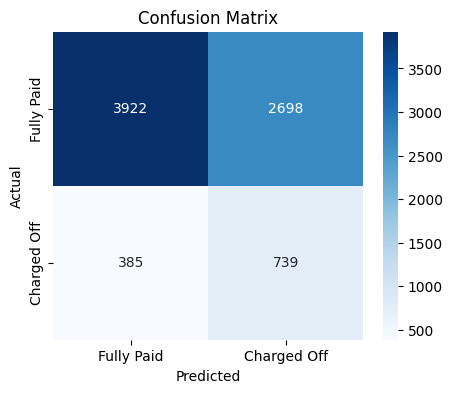

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Fully Paid', 'Charged Off'], yticklabels=['Fully Paid', 'Charged Off'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
from sklearn.metrics import classification_report
## Plot the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.59      0.72      6620
           1       0.22      0.66      0.32      1124

    accuracy                           0.60      7744
   macro avg       0.56      0.62      0.52      7744
weighted avg       0.81      0.60      0.66      7744



Observations

- The model correctly classifies Fully Paid loans but struggles with defaults.
- Recall is decent (0.66) for defaults, but precision is very low (0.22).
- Imbalance still affects performance, despite SMOTE.
Consider adjusting class weights, using better models, or tuning thresholds for improvement.

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)
tree_clf.fit(X_resampled, y_resampled)
y_pred_tree = tree_clf.predict(X_test_scaled)

In [34]:
## Check its evaluation metrics
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)

Accuracy: 0.5130
Precision: 0.1670
Recall: 0.5907
F1 Score: 0.2604

Confusion Matrix:
[[3309 3311]
 [ 460  664]]


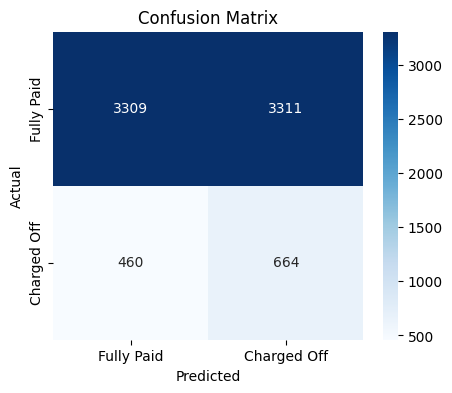

In [35]:
# Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Fully Paid', 'Charged Off'], yticklabels=['Fully Paid', 'Charged Off'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [36]:
## Plot the classification report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64      6620
           1       0.17      0.59      0.26      1124

    accuracy                           0.51      7744
   macro avg       0.52      0.55      0.45      7744
weighted avg       0.77      0.51      0.58      7744



- The model correctly classifies Fully Paid loans but struggles with defaults.
- Recall is decent (0.59) for defaults, but precision is very low (0.17).
- Imbalance still affects performance, despite SMOTE. Consider adjusting class weights, using better models, or tuning thresholds for improvement.

In [37]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(scale_pos_weight=len(y_resampled) / sum(y_resampled), random_state=42)
xgb_clf.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]  # Get probability scores for ROC-AUC

In [38]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Print performance metrics
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")
print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)

🔹 Accuracy: 0.4553
🔹 Precision: 0.1676
🔹 Recall: 0.6940
🔹 F1 Score: 0.2700
🔹 ROC-AUC Score: 0.5749

🔹 Confusion Matrix:
[[2746 3874]
 [ 344  780]]


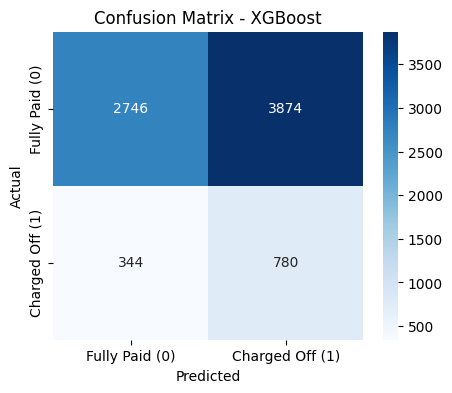

In [39]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Fully Paid (0)', 'Charged Off (1)'],
            yticklabels=['Fully Paid (0)', 'Charged Off (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [40]:
## Plot the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.41      0.57      6620
           1       0.17      0.69      0.27      1124

    accuracy                           0.46      7744
   macro avg       0.53      0.55      0.42      7744
weighted avg       0.78      0.46      0.52      7744



Let's try a decision tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled, y_resampled)  # Replace X_train and y_train with your data

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best model to the data
best_rf.fit(X_resampled, y_resampled)

In [ ]:
print(y.value_counts(normalize=True))
from sklearn.metrics import classification_report, roc_auc_score, f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling Class Imbalance if Imbalanced
if y.value_counts(normalize=True).min() < 0.4:  # Example threshold for imbalance
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Models and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

roc_auc_scores = {}
f1_scores = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    roc_auc_scores[name] = roc_auc
    f1_scores[name] = f1

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

    print(f"{name}:")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()

# Bar Chart for F1 Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.ylabel("F1 Score")
plt.title("Model Comparison - F1 Score")
plt.show()

# Building Deep Learning Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_resampled, y_resampled, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict using the Deep Learning Model
y_pred_dl = (model.predict(X_test) > 0.5).astype(int).flatten()
y_prob_dl = model.predict(X_test).flatten()

# Compute Evaluation Metrics for Deep Learning Model
print("Deep Learning Model:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_dl):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dl):.4f}")
print("-" * 40)

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

default_flag
0    0.854907
1    0.145093
Name: proportion, dtype: float64
Logistic Regression:
ROC-AUC Score: 0.6819
F1 Score: 0.3236
----------------------------------------
Random Forest:
ROC-AUC Score: 0.6788
F1 Score: 0.1157
----------------------------------------
XGBoost:
ROC-AUC Score: 0.6796
F1 Score: 0.1077
----------------------------------------


---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.